In [1]:
from cobra.io import read_sbml_model
from mewpy.simulation import get_simulator
import pandas as pd


from mewpy.omics import ExpressionSet
from mewpy.omics import GIMME
from mewpy.omics import eFlux

import matplotlib.pyplot as plt


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-07-28
Using license file /Users/katemeeson/gurobi.lic


In [2]:
from mewpy.simulation import solvers
solvers

['gurobi', 'cplex']

In [3]:
from mewpy.simulation import set_default_solver
set_default_solver('gurobi')

In [116]:
model = read_sbml_model('Human-GEM-annotated.xml')

In [117]:
model

Name,HumanGEM
Memory address,0x0130a797c0
Number of metabolites,8400
Number of reactions,13096
Number of groups,143
Objective expression,1.0*biomass_human - 1.0*biomass_human_reverse_fb2f2
Compartments,"Cytosol, Extracellular, Lysosome, Endoplasmic reticulum, Mitochondria, Peroxisome, Golgi apparatus, Nucleus, Inner mitochondria"


In [6]:
x = model.reactions.get_by_id

In [8]:
%store -r envcondov56

In [9]:
envcondov56_high_glucose = envcondov56.copy()
envcondov56_low_glucose = envcondov56.copy()
envcondov56_no_glucose = envcondov56.copy()

envcondov56_high_glucose['HMR_9034'] = (-4.5,1000)
envcondov56_low_glucose['HMR_9034'] = (-1.0,1000)
envcondov56_no_glucose['HMR_9034'] = (0,1000)

print('high glucose conditions (g/L):', envcondov56_high_glucose['HMR_9034'])
print('low glucose conditions (g/L):', envcondov56_low_glucose['HMR_9034'])
print('no glucose conditions (g/L):', envcondov56_no_glucose['HMR_9034'])

high glucose conditions (g/L): (-4.5, 1000)
low glucose conditions (g/L): (-1.0, 1000)
no glucose conditions (g/L): (0, 1000)


In [21]:
simul = get_simulator(model, envcond = envcondov56_high_glucose)

print(x('HMR_9034').bounds)
res_high_glucose = simul.simulate(method="pFBA")
print(res_high_glucose)

(-4.5, 1000)
objective: 992.6674546258789
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0, 1000)), ('HMR_7110', (0, 1000)), ('HMR_7112', (0, 1000)), ('HMR_7114', (0, 1000)), ('HMR_7116', (0, 1000)), ('HMR_7118', (0, 1000)), ('HMR_7120', (0, 1000)), ('HMR_7122', (0, 1000)), ('HMR_7124', (0, 1000)), ('HMR_7126', (0, 1000)), ('HMR_9023', (0, 1000)), ('HMR_9024', (0, 1000)), ('HMR_9032', (0, 1000)), ('HMR_9808', (0, 1000)), ('HMR_9809', (0, 1000)), ('HMR_9810', (0, 1000)), ('HMR_9811', (0, 1000)), ('HMR_9812', (0, 1000)), ('HMR_9813', (0, 1000)), ('HMR_9814', (0, 1000)), ('HMR_9815', (0, 1000)), ('HMR_9816', (0, 1000)), ('HMR_9033', (0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0, 1000)), ('HMR_9037', (0, 1000)), ('HMR_9038', (0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044', (0, 1000)), ('HMR_9045', (-0.00902, 1000

In [22]:
solution = model.optimize()
high_gluc_growth_rate = solution.objective_value
high_gluc_growth_rate

0.07246376811594203

In [23]:
high_gluc_summary = model.summary()
high_gluc_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03767,1569,6.58%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.14,27,3.43%
nfdoh_s,EX_nfdoh[e],32.9,16,58.62%
m02328s,HMR_10027,6.878,31,23.74%
m01965s,HMR_9034,4.5,6,3.01%
m02184s,HMR_9039,0.05447,6,0.04%
m02360s,HMR_9040,0.05905,6,0.04%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.04%


In [24]:
simul = get_simulator(model, envcond = envcondov56_low_glucose)

print(x('HMR_9034').bounds)
res_low_glucose = simul.simulate(method="pFBA")
print(res_low_glucose)

(-1.0, 1000)
objective: 1008.7596894512642
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0, 1000)), ('HMR_7110', (0, 1000)), ('HMR_7112', (0, 1000)), ('HMR_7114', (0, 1000)), ('HMR_7116', (0, 1000)), ('HMR_7118', (0, 1000)), ('HMR_7120', (0, 1000)), ('HMR_7122', (0, 1000)), ('HMR_7124', (0, 1000)), ('HMR_7126', (0, 1000)), ('HMR_9023', (0, 1000)), ('HMR_9024', (0, 1000)), ('HMR_9032', (0, 1000)), ('HMR_9808', (0, 1000)), ('HMR_9809', (0, 1000)), ('HMR_9810', (0, 1000)), ('HMR_9811', (0, 1000)), ('HMR_9812', (0, 1000)), ('HMR_9813', (0, 1000)), ('HMR_9814', (0, 1000)), ('HMR_9815', (0, 1000)), ('HMR_9816', (0, 1000)), ('HMR_9033', (0, 1000)), ('HMR_9034', (-1.0, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0, 1000)), ('HMR_9037', (0, 1000)), ('HMR_9038', (0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044', (0, 1000)), ('HMR_9045', (-0.00902, 100

In [25]:
solution = model.optimize()
low_gluc_growth_rate = solution.objective_value
low_gluc_growth_rate

0.07246376793298859

In [26]:
low_gluc_summary = model.summary()
low_gluc_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03633,1569,5.62%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.316,27,3.51%
nfdoh_s,EX_nfdoh[e],38.88,16,61.39%
m02328s,HMR_10027,7.918,31,24.22%
m01965s,HMR_9034,1,6,0.59%
m02184s,HMR_9039,0.05447,6,0.03%
m02360s,HMR_9040,0.05905,6,0.03%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.03%


In [27]:
simul = get_simulator(model, envcond = envcondov56_no_glucose)

print(x('HMR_9034').bounds)
res_no_glucose = simul.simulate(method="pFBA")
print(res_no_glucose)

(0, 1000)
objective: 1013.6546131703276
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0, 1000)), ('HMR_7110', (0, 1000)), ('HMR_7112', (0, 1000)), ('HMR_7114', (0, 1000)), ('HMR_7116', (0, 1000)), ('HMR_7118', (0, 1000)), ('HMR_7120', (0, 1000)), ('HMR_7122', (0, 1000)), ('HMR_7124', (0, 1000)), ('HMR_7126', (0, 1000)), ('HMR_9023', (0, 1000)), ('HMR_9024', (0, 1000)), ('HMR_9032', (0, 1000)), ('HMR_9808', (0, 1000)), ('HMR_9809', (0, 1000)), ('HMR_9810', (0, 1000)), ('HMR_9811', (0, 1000)), ('HMR_9812', (0, 1000)), ('HMR_9813', (0, 1000)), ('HMR_9814', (0, 1000)), ('HMR_9815', (0, 1000)), ('HMR_9816', (0, 1000)), ('HMR_9033', (0, 1000)), ('HMR_9034', (0, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0, 1000)), ('HMR_9037', (0, 1000)), ('HMR_9038', (0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044', (0, 1000)), ('HMR_9045', (-0.00902, 1000)), (

In [28]:
solution = model.optimize()
no_gluc_growth_rate = solution.objective_value
no_gluc_growth_rate

0.07246376811594203

In [29]:
no_gluc_summary = model.summary()
no_gluc_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03626,1569,5.44%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.366,27,3.53%
nfdoh_s,EX_nfdoh[e],40.54,16,62.01%
m02328s,HMR_10027,8.22,31,24.36%
m02184s,HMR_9039,0.05447,6,0.03%
m02360s,HMR_9040,0.05905,6,0.03%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.03%
m03135s,HMR_9046,0.05285,5,0.03%


In [40]:
print('glucose import for no glucose conditions:', res_no_glucose.fluxes['HMR_9034'])
print('glucose import for low glucose conditions:', res_low_glucose.fluxes['HMR_9034'])
print('glucose import for high glucose conditions:', res_high_glucose.fluxes['HMR_9034'])
print('\n')
print('pFBA solution no glucose:',res_no_glucose.objective_value)
print('pFBA solution low glucose:',res_low_glucose.objective_value)
print('pFBA solution high glucose:',res_high_glucose.objective_value)
print('\n')
print('growth rate no glucose:', no_gluc_growth_rate)
print('growth rate low glucose:', low_gluc_growth_rate)
print('growth rate high glucose:', high_gluc_growth_rate)
growth_rates = [no_gluc_growth_rate, low_gluc_growth_rate, high_gluc_growth_rate]

glucose import for no glucose conditions: 0.0
glucose import for low glucose conditions: -1.0
glucose import for high glucose conditions: -4.5


pFBA solution no glucose: 1013.6546131703276
pFBA solution low glucose: 1008.7596894512642
pFBA solution high glucose: 992.6674546258789


growth rate no glucose: 0.07246376811594203
growth rate low glucose: 0.07246376793298859
growth rate high glucose: 0.07246376811594203


In [42]:
#code to print which growth condition gives highest growth. Useful for when I have a big screen. 
largest_number = growth_rates[0]
for number in growth_rates:
    if number > largest_number:
        largest_number = number
print(largest_number)
if largest_number == no_gluc_growth_rate:
    print('no glucose gives highest growth')
if largest_number == low_gluc_growth_rate:
    print('low glucose gives highest growth')
if largest_number == no_gluc_growth_rate:
    print('high glucose gives highest growth')

0.07246376811594203
no glucose gives highest growth
high glucose gives highest growth


In [ ]:
#name of file for the 57 basic metabolic tasks is 'aaz1482_data_file_s3' in my downloads. 

In [118]:
#reset to high glucose conditions
simul = get_simulator(model, envcond = envcondov56_high_glucose)

print(x('HMR_9034').bounds)

(-4.5, 1000)


In [43]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction biomass_human at 0x124c53eb0>: 1.0}

In [47]:
with model:
    model.objective = {model.reactions.biomass_human: 0.5}
    model.optimize()
    print(model.reactions.biomass_human.flux)

0.07246376811594203


In [69]:
with model:
    model.objective = {model.reactions.biomass_human: 0, model.reactions.HMR_9034: 1.0}
    model.optimize()
    print(linear_reaction_coefficients(model))
    print(model.reactions.biomass_human.flux)
    model.objective.expression

{<Reaction HMR_9034 at 0x123031df0>: 1.0}
0.07246376811594202


In [80]:
model.medium

{'HMR_9034': 4.5,
 'HMR_9035': 4.2e-05,
 'HMR_9039': 0.05447,
 'HMR_9040': 0.05905,
 'HMR_9042': 0.01724,
 'HMR_9043': 0.03548,
 'HMR_9045': 0.00902,
 'HMR_9046': 0.05285,
 'HMR_9061': 0.00445,
 'HMR_9063': 0.365,
 'HMR_9067': 0.01875,
 'HMR_9068': 0.01725,
 'HMR_9069': 0.02625,
 'HMR_9070': 0.00665,
 'HMR_9071': 0.00735,
 'HMR_9107': 1000,
 'HMR_9109': 3e-06,
 'HMR_9143': 0.000219,
 'HMR_9146': 0.00265,
 'HMR_9152': 1000,
 'HMR_9154': 1000,
 'HMR_9159': 1000,
 'HMR_9167': 0.000105,
 'HMR_9269': 1000,
 'HMR_9358': 0.00239,
 'HMR_9361': 0.0126,
 'HMR_9423': 0.000365,
 'HMR_9691': 1000,
 'EX_hxcoa[e]': 1000,
 'EX_HC00009[e]': 1000,
 'EX_nfdoh[e]': 1000,
 'EX_oxyp[e]': 1000,
 'EX_oxyp1rb[e]': 1000,
 'EX_oxyp7rb[e]': 1000,
 'EX_profvs[e]': 1000,
 'EX_ptvst[e]': 1000,
 'EX_ptvstlac[e]': 1000,
 'EX_ptvstm3[e]': 1000,
 'EX_M02837[e]': 1000,
 'HMR_10027': 1000,
 'HMR_10029': 1000,
 'HMR_10030': 1000,
 'HMR_10031': 1000,
 'HMR_10032': 1000,
 'HMR_10047': 1000,
 'HMR_10060': 1000,
 'HMR_10074': 

# which media components when changes affect growth?

In [148]:
original_solution = model.slim_optimize()
original_solution

0.07246376811594202

In [121]:
model.medium

{'HMR_9034': 4.5,
 'HMR_9035': 4.2e-05,
 'HMR_9039': 0.05447,
 'HMR_9040': 0.05905,
 'HMR_9042': 0.01724,
 'HMR_9043': 0.03548,
 'HMR_9045': 0.00902,
 'HMR_9046': 0.05285,
 'HMR_9061': 0.00445,
 'HMR_9063': 0.365,
 'HMR_9067': 0.01875,
 'HMR_9068': 0.01725,
 'HMR_9069': 0.02625,
 'HMR_9070': 0.00665,
 'HMR_9071': 0.00735,
 'HMR_9107': 1000,
 'HMR_9109': 3e-06,
 'HMR_9143': 0.000219,
 'HMR_9146': 0.00265,
 'HMR_9152': 1000,
 'HMR_9154': 1000,
 'HMR_9159': 1000,
 'HMR_9167': 0.000105,
 'HMR_9269': 1000,
 'HMR_9358': 0.00239,
 'HMR_9361': 0.0126,
 'HMR_9423': 0.000365,
 'HMR_9691': 1000,
 'EX_hxcoa[e]': 1000,
 'EX_HC00009[e]': 1000,
 'EX_nfdoh[e]': 1000,
 'EX_oxyp[e]': 1000,
 'EX_oxyp1rb[e]': 1000,
 'EX_oxyp7rb[e]': 1000,
 'EX_profvs[e]': 1000,
 'EX_ptvst[e]': 1000,
 'EX_ptvstlac[e]': 1000,
 'EX_ptvstm3[e]': 1000,
 'EX_M02837[e]': 1000,
 'HMR_10027': 1000,
 'HMR_10029': 1000,
 'HMR_10030': 1000,
 'HMR_10031': 1000,
 'HMR_10032': 1000,
 'HMR_10047': 1000,
 'HMR_10060': 1000,
 'HMR_10074': 

In [126]:
exchanges = model.exchanges
print(exchanges[0].id)
print(len(exchanges))

HMR_7108
1673


In [139]:
print(len(model.medium))
for key in model.medium.keys():
    print(key)

61
HMR_9034
HMR_9035
HMR_9039
HMR_9040
HMR_9042
HMR_9043
HMR_9045
HMR_9046
HMR_9061
HMR_9063
HMR_9067
HMR_9068
HMR_9069
HMR_9070
HMR_9071
HMR_9107
HMR_9109
HMR_9143
HMR_9146
HMR_9152
HMR_9154
HMR_9159
HMR_9167
HMR_9269
HMR_9358
HMR_9361
HMR_9423
HMR_9691
EX_hxcoa[e]
EX_HC00009[e]
EX_nfdoh[e]
EX_oxyp[e]
EX_oxyp1rb[e]
EX_oxyp7rb[e]
EX_profvs[e]
EX_ptvst[e]
EX_ptvstlac[e]
EX_ptvstm3[e]
EX_M02837[e]
HMR_10027
HMR_10029
HMR_10030
HMR_10031
HMR_10032
HMR_10047
HMR_10060
HMR_10074
HMR_10076
HMR_10077
HMR_10078
HMR_10081
HMR_10083
HMR_10084
HMR_10085
HMR_10086
HMR_10087
HMR_10088
HMR_10089
HMR_10090
HMR_10091
HMR_10132


In [140]:
media_target_list = []
reduced_growths_list = []

with model:
    for key in model.medium.keys():
        for num in range(len(exchanges)):
            if key in exchanges[num].id:
                medium = model.medium
                medium[exchanges[num].id] = 0.0
                model.medium = medium
                if model.slim_optimize() == 0:
                    media_target_list.append(exchanges[num].name)
                    reduced_growths_list.append(model.slim_optimize())

In [151]:
media_scanning_df['media component'] = media_target_list
media_scanning_df['growth rate when media component blocked (/hour)'] = reduced_growths_list
print('Number of media components which when blocked will reduce growth rate to zero:', len(media_target_list))

Number of media components which when blocked will reduce growth rate to zero: 37


In [144]:
media_scanning_df

,media component,growth rate when media component blocked (/hour)
0,-1.0 heme <-->,0.0
1,-1.0 biotin <-->,0.0
2,-1.0 riboflavin <-->,0.0
3,-1.0 folate <-->,0.0
4,-1.0 alpha-tocotrienol <-->,0.0
5,-1.0 gamma-tocotrienol <-->,0.0
6,-1.0 thiamin <-->,0.0
7,-1.0 lipoic acid <-->,0.0
8,-1.0 aquacob(III)alamin <-->,0.0
9,-1.0 hypoxanthine <-->,0.0


In [145]:
column_names = ['media component', 'growth rate when media component blocked (/hour)']
media_scanning_df2 = pd.DataFrame(columns = column_names)
media_scanning_df2

,media component,growth rate when media component blocked (/hour)


In [180]:
%store original_solution

Stored 'original_solution' (float)


In [150]:
media_target_list2 = []
reduced_growths_list2 = []

with model:
    for key in model.medium.keys():
        for num in range(len(exchanges)):
            if key in exchanges[num].id:
                medium = model.medium
                medium[exchanges[num].id] = 0.0
                model.medium = medium
                if model.slim_optimize() != original_solution:
                    media_target_list2.append(exchanges[num].name)
                    reduced_growths_list2.append(model.slim_optimize())

In [152]:
media_scanning_df2['media component'] = media_target_list2
media_scanning_df2['growth rate when media component blocked (/hour)'] = reduced_growths_list2
print('Number of media components which when blocked will alter growth rate:', len(media_target_list2))

Number of media components which when blocked will alter growth rate: 46


In [153]:
media_scanning_df2

,media component,growth rate when media component blocked (/hour)
0,-1.0 heme <-->,0.000000e+00
1,-1.0 biotin <-->,0.000000e+00
2,-1.0 riboflavin <-->,0.000000e+00
3,-1.0 folate <-->,0.000000e+00
4,-1.0 alpha-tocotrienol <-->,0.000000e+00
5,-1.0 gamma-tocotrienol <-->,0.000000e+00
6,-1.0 thiamin <-->,0.000000e+00
7,-1.0 lipoic acid <-->,0.000000e+00
8,-1.0 aquacob(III)alamin <-->,0.000000e+00
9,-1.0 hypoxanthine <-->,0.000000e+00


In [183]:
%store media_scanning_df2

Stored 'media_scanning_df2' (DataFrame)


In [154]:
media_scanning_df2.to_csv('media_scanning_df2.csv')

In [125]:
with model:
    medium = model.medium
    medium["HMR_9034"] = 0.0
    model.medium = medium
    print(model.slim_optimize())
print(model.slim_optimize())

0.07246376811594203
0.07246376811594203


In [142]:
column_names = ['media component', 'growth rate when media component blocked (/hour)']
media_scanning_df = pd.DataFrame(columns = column_names)
media_scanning_df

,media component,growth rate when media component blocked (/hour)


In [ ]:
# pyridoxal-phosphate is the only reaction for which growth isn't blocked to zero. Try lowering and not completely depleting this concentration...

In [155]:
for m in model.exchanges:
    if 'pyridoxal-phosphate' in m.name:
        print(x(m.id))

HMR_9691: m02814s <=> 


In [156]:
x('HMR_9691')

Reaction identifier,HMR_9691
Name,-1.0 pyridoxal-phosphate <-->
Memory address,0x0123147850
Stoichiometry,m02814s <=> pyridoxal-phosphate <=>
GPR,
Lower bound,-1000
Upper bound,1000


In [159]:
print('concentration of pyridoxal-phosphate in media =', model.medium['HMR_9691'])

concentration of pyridoxal-phosphate in media = 1000


In [163]:
with model:
    medium = model.medium
    medium["HMR_9691"] = 1.0
    model.medium = medium
    print(model.slim_optimize())
print(model.slim_optimize())

0.0192087648183936
0.07246376811594202


In [164]:
for n in range(0,1000,10):
    print(n)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [170]:
import numpy as np
range_of_solutions = []

with model:
    for n in np.arange(0,5.1,0.1):
        medium = model.medium
        medium["HMR_9691"] = n
        model.medium = medium
        print(n, model.slim_optimize())
        new_solution = model.slim_optimize()
        range_of_solutions.append(new_solution)

0.0 0.0
0.1 0.0019208999818240216
0.2 0.003841799963730458
0.30000000000000004 0.005762629444521744
0.4 0.007683505926338466
0.5 0.009604382408145205
0.6000000000000001 0.011525258889986883
0.7000000000000001 0.013446135371773655
0.8 0.01536701185357041
0.9 0.017287888336203636
1.0 0.019208764818020068
1.1 0.021129641299836834
1.2000000000000002 0.02305051778161458
1.3 0.024971394263447563
1.4000000000000001 0.026892270745234342
1.5 0.028813147227039086
1.6 0.03073402370887464
1.7000000000000002 0.032654900190672964
1.8 0.034575776672481566
1.9000000000000001 0.03649665315428245
2.0 0.038417529636098756
2.1 0.04033840611769069
2.2 0.042259282599489745
2.3000000000000003 0.044180159081314604
2.4000000000000004 0.046101035563268264
2.5 0.048021912045097634
2.6 0.04994278852688264
2.7 0.05186366500868806
2.8000000000000003 0.05378454149052013
2.9000000000000004 0.055705417972421116
3.0 0.057626294454222904
3.1 0.05954717093605717
3.2 0.06146804741785207
3.3000000000000003 0.06338892389970

In [171]:
x_axis = []
for n in np.arange(0,5.1,0.1):
    x_axis.append(n)

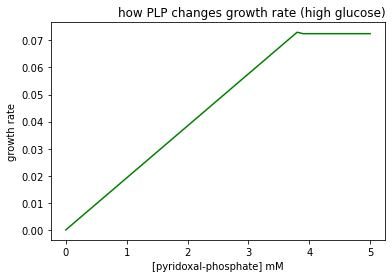

In [187]:
plt.plot(x_axis,range_of_solutions, 'g')
plt.title('how PLP changes growth rate (high glucose)', loc='right')
plt.xlabel('[pyridoxal-phosphate] mM')
plt.ylabel('growth rate')
plt.savefig('pyridoxal-phosphatexgrowth_rate_method3.png', dpi=1500)
plt.show()

# does growth depend on the same media components for low glucose as for high glucose?

In [173]:
model = read_sbml_model('Human-GEM-annotated.xml')
model

Name,HumanGEM
Memory address,0x0137394910
Number of metabolites,8400
Number of reactions,13096
Number of groups,143
Objective expression,1.0*biomass_human - 1.0*biomass_human_reverse_fb2f2
Compartments,"Cytosol, Extracellular, Lysosome, Endoplasmic reticulum, Mitochondria, Peroxisome, Golgi apparatus, Nucleus, Inner mitochondria"


In [178]:
simul = get_simulator(model, envcond = envcondov56_low_glucose)

print(x('HMR_9034').bounds)
res_low_glucose = simul.simulate(method="pFBA")
print(res_low_glucose)
#right pFBA solution but wrong bounds printed. 

(-4.5, 1000)
objective: 1008.7596894512642
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0, 1000)), ('HMR_7110', (0, 1000)), ('HMR_7112', (0, 1000)), ('HMR_7114', (0, 1000)), ('HMR_7116', (0, 1000)), ('HMR_7118', (0, 1000)), ('HMR_7120', (0, 1000)), ('HMR_7122', (0, 1000)), ('HMR_7124', (0, 1000)), ('HMR_7126', (0, 1000)), ('HMR_9023', (0, 1000)), ('HMR_9024', (0, 1000)), ('HMR_9032', (0, 1000)), ('HMR_9808', (0, 1000)), ('HMR_9809', (0, 1000)), ('HMR_9810', (0, 1000)), ('HMR_9811', (0, 1000)), ('HMR_9812', (0, 1000)), ('HMR_9813', (0, 1000)), ('HMR_9814', (0, 1000)), ('HMR_9815', (0, 1000)), ('HMR_9816', (0, 1000)), ('HMR_9033', (0, 1000)), ('HMR_9034', (-1.0, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0, 1000)), ('HMR_9037', (0, 1000)), ('HMR_9038', (0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044', (0, 1000)), ('HMR_9045', (-0.00902, 100

In [1]:
original_solution_low = model.slim_optimize()
original_solution_low

NameError: name 'model' is not defined

In [185]:
%store range_of_solutions

Stored 'range_of_solutions' (list)
